/var/folders/kn/kyxv4hjd05s8hfp0231s5y900000gn/T/ipykernel_57765/886304523.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Data type: <class 'torch.Tensor'>, Shape: torch.Size([33945, 1, 240])
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33945 entries, 0 to 33944
Columns: 240 entries, Week_1 to Week_240
dtypes: float64(240)
memory usage: 62.2 MB
None

Basic Statistics:
             Week_1        Week_2        Week_3        Week_4        Week_5  \
count  33945.000000  33945.000000  33945.000000  33945.000000  33945.000000   
mean      25.811664     48.014052     48.880662     46.103866     51.774787   
std       53.323981    101.725239     93.823919     90.540350     96.729020   
min        0.000000    -89.000000      0.000000      0.000000      0.000000   
25%        4.000000     10.000000     11.000000     10.000000     12.000000   
50%       12.000000     23.000000     24.000000     23.000000     26.000000   
75%       27.000000     52.000000     53.000000     50.000000     57.000000   
max     2174.000000   4446.000000   5428.342000   4139.000000   5634.653000   

             Week_6 

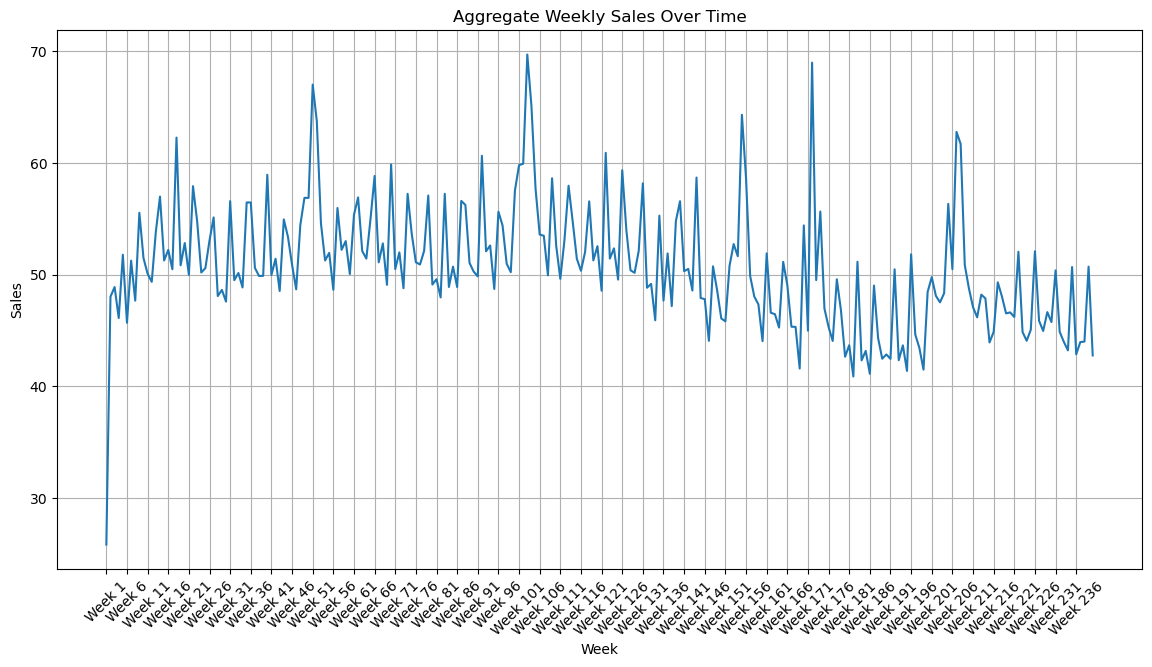

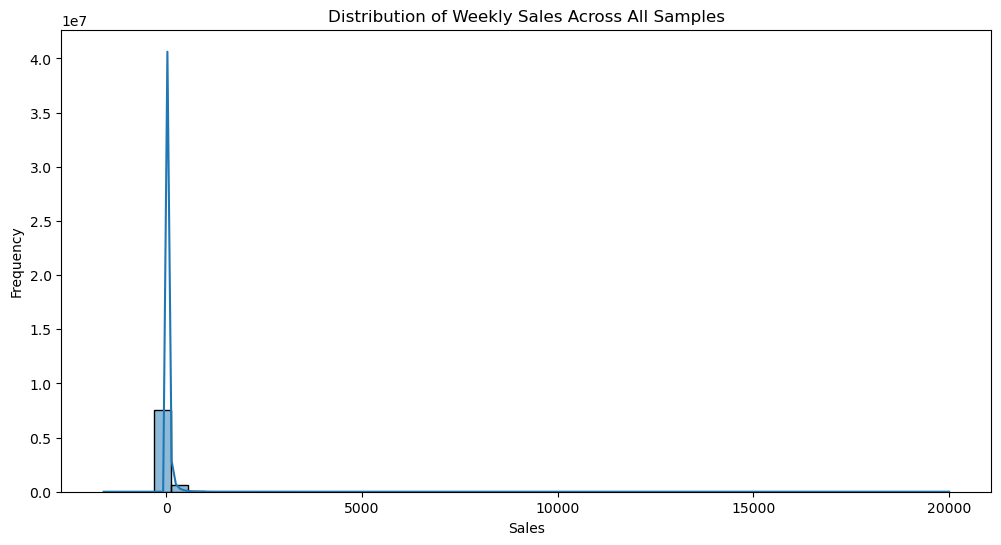

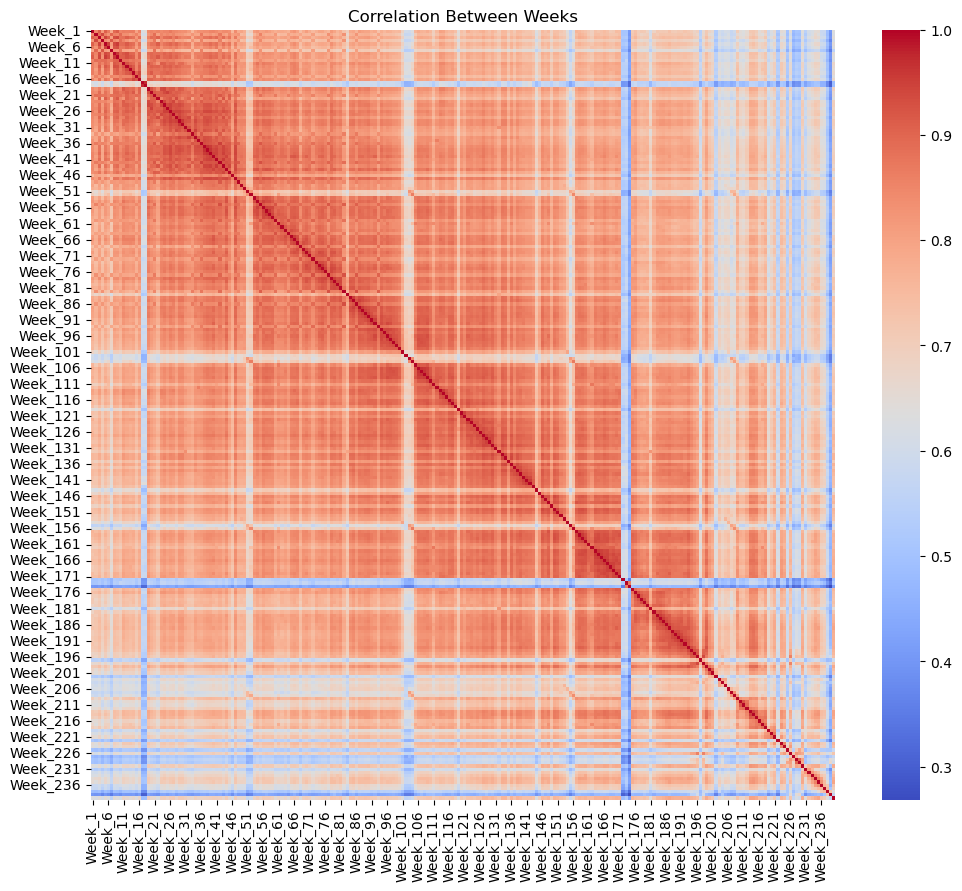

In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the .pt file
file_path = "data_files/favorita/weekly_sales.pt"
data = torch.load(file_path)

# Check the shape and type of the loaded data
print(f"Data type: {type(data)}, Shape: {data.shape}")

# Convert to NumPy array for easier manipulation
data_np = data.numpy()

# Check if it's 3D
if data_np.ndim == 3:
    # Reshape the data for analysis
    # Assuming axis 0 = samples (e.g., items), axis 1 = group (e.g., stores), axis 2 = time (e.g., weeks)
    reshaped_data = data_np.squeeze(1)  # Remove the singleton dimension (shape becomes (33945, 240))
    
    # Create a DataFrame with time as columns and samples as rows
    df = pd.DataFrame(reshaped_data)
    df.columns = [f"Week_{i+1}" for i in range(reshaped_data.shape[1])]  # Rename columns as "Week_1", "Week_2", ...
else:
    raise ValueError("The data format is not supported for this script.")

# Print dataset info
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())

# Aggregate weekly data to analyze trends (e.g., mean across all samples for each week)
weekly_aggregates = df.mean()

# Plot time series of aggregate weekly sales
plt.figure(figsize=(14, 7))
sns.lineplot(x=weekly_aggregates.index, y=weekly_aggregates.values)
plt.title("Aggregate Weekly Sales Over Time")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.xticks(ticks=np.arange(0, reshaped_data.shape[1], 5), labels=[f"Week {i}" for i in range(1, reshaped_data.shape[1]+1, 5)], rotation=45)
plt.grid(True)
plt.show()

# Distribution of sales values
plt.figure(figsize=(12, 6))
sns.histplot(df.values.flatten(), bins=50, kde=True)
plt.title("Distribution of Weekly Sales Across All Samples")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of weekly sales
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Between Weeks")
plt.show()


# Visualizing Per Store

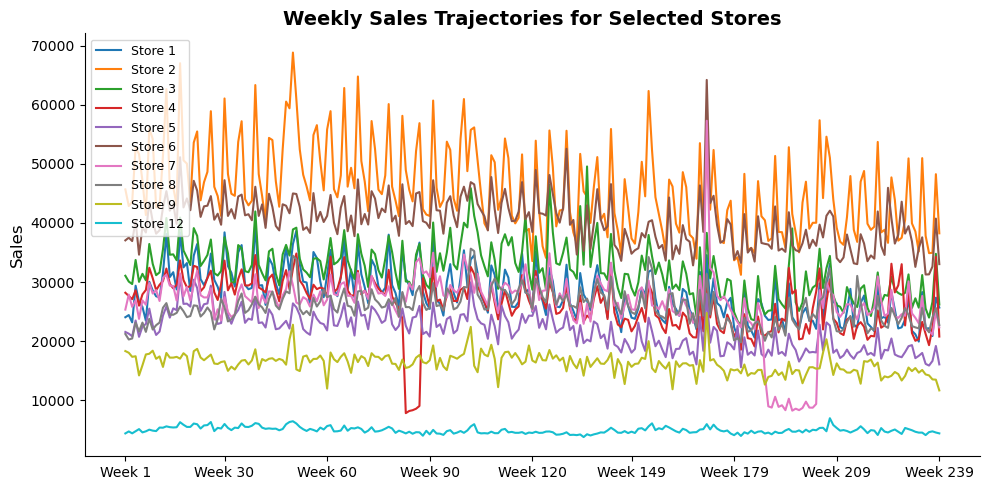

In [16]:
plt.figure(figsize=(10, 5))

# Plot each store's trajectory
for store in sample_stores:
    sales = store_weekly_sales.loc[store].values
    plt.plot(range(1, num_weeks+1), sales, linewidth=1.5, label=f"Store {store}")

# Reduce the number of x-ticks to 1/4th of total weeks
xtick_indices = np.linspace(1, num_weeks, num_weeks // 25, dtype=int)
plt.xticks(xtick_indices, [f"Week {i}" for i in xtick_indices])

# Labels and title
plt.title("Weekly Sales Trajectories for Selected Stores", fontsize=14, fontweight='bold')
# plt.xlabel("Week", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Remove grid
plt.grid(False)

# Optionally remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show legend with a sensible location
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


Aggregate Metrics Across Time (Mean and Standard Deviation): use to motivate base-stock policy

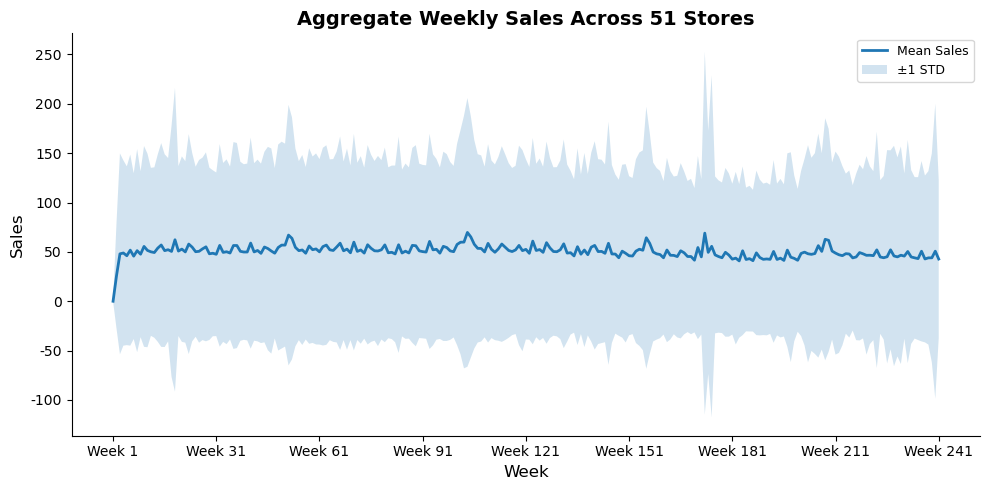

In [31]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))

# Correct range for x to match the length of mean_sales
plt.plot(range(1, len(mean_sales) + 1), mean_sales.values, linewidth=2, label="Mean Sales")

# Shade area for mean ± std
plt.fill_between(range(1, len(mean_sales) + 1),
                 (mean_sales - std_sales).values,
                 (mean_sales + std_sales).values,
                 alpha=0.2, label="±1 STD")

# Reduce the number of x-ticks to approximately 1/4th of total weeks
xtick_indices = np.linspace(1, len(mean_sales), len(mean_sales) // 25, dtype=int)
plt.xticks(xtick_indices, [f"Week {i}" for i in xtick_indices])

# Labels and title
plt.title("Aggregate Weekly Sales Across 51 Stores", fontsize=14, fontweight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# Apply custom y-axis formatter to prevent truncation
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Add commas to large numbers

# Remove grid
plt.grid(False)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd

# Load the metadata
metadata_path = "data_files/favorita/tensors_row_info.csv"
metadata = pd.read_csv(metadata_path)

# Count unique stores
total_stores = metadata["store_nbr"].nunique()
print(f"Total number of stores: {total_stores}")


Total number of stores: 51
